In [12]:
#optional
from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [1]:
# relevant packages
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from sklearn.linear_model import LinearRegression

sns.set_theme(style='ticks', context='paper')

In [2]:
# Load data
df_50HZ=pd.read_parquet("data/data_DE_50HZ.parquet")
df_AMPRION=pd.read_parquet("data/data_DE_AMPRION.parquet")
df_TENNET=pd.read_parquet("data/data_DE_TENNET.parquet")
df_TRANSNET=pd.read_parquet("data/data_DE_TRANSNET.parquet")

# Create grid dictionary
TSO_dict = {
    "DE_50HZ" : df_50HZ, 
    "DE_AMPRION" : df_AMPRION, 
    "DE_TENNET"  : df_TENNET, 
    "DE_TRANSNET": df_TRANSNET 
        }

## Descriptive statistics

In [15]:
CI_all = pd.concat([TSO_dict[i]["CO2_intensity_in_gCO2_per_KWh"].rename(f"CI_{i}") for i in TSO_dict], axis=1)

In [16]:
display(CI_all.describe())
# 
#display(CI_all.loc["2016"].describe())
#display(CI_all.loc["2023"].describe())

,CI_DE_50HZ,CI_DE_AMPRION,CI_DE_TENNET,CI_DE_TRANSNET
count,80232.000000,80232.000000,80232.000000,80232.000000
mean,542.276090,535.182449,190.515867,262.204917
std,155.799548,120.437313,88.568984,112.623057
min,128.395067,151.210309,37.277798,54.389651
25%,432.454755,467.506786,115.160750,168.041830
50%,561.112111,562.198124,173.529134,254.993469
75%,667.083614,626.388680,253.656044,347.342199
max,852.464333,804.854786,491.604983,627.549345


## General insights

Change mean yearly carbon intensity
2015-12-31 00:00:00+01:00    605.890251
2016-12-31 00:00:00+01:00    610.410102
2017-12-31 00:00:00+01:00    582.632833
2018-12-31 00:00:00+01:00    578.261695
2019-12-31 00:00:00+01:00    528.192772
2020-12-31 00:00:00+01:00    482.237334
2021-12-31 00:00:00+01:00    535.921996
2022-12-31 00:00:00+01:00    522.665664
2023-12-31 00:00:00+01:00    454.324404
Freq: YE-DEC, Name: CO2_intensity_in_gCO2_per_KWh, dtype: float64
2015-12-31 00:00:00+01:00    612.464039
2016-12-31 00:00:00+01:00    607.189393
2017-12-31 00:00:00+01:00    571.028061
2018-12-31 00:00:00+01:00    578.587511
2019-12-31 00:00:00+01:00    501.262310
2020-12-31 00:00:00+01:00    441.396169
2021-12-31 00:00:00+01:00    490.182624
2022-12-31 00:00:00+01:00    545.608386
2023-12-31 00:00:00+01:00    479.485002
Freq: YE-DEC, Name: CO2_intensity_in_gCO2_per_KWh, dtype: float64
2015-12-31 00:00:00+01:00    251.223627
2016-12-31 00:00:00+01:00    231.644757
2017-12-31 00:00:00+01:00    219

/var/folders/5g/lvwxyq7s561_kx52v96mb3dh0000gn/T/ipykernel_91004/1953151921.py:22: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  carbon_intensity_means.append(TSO_dict[i]["CO2_intensity_in_gCO2_per_KWh"].loc["2015":"2023"].groupby(pd.Grouper(freq='1Y')).mean())
/var/folders/5g/lvwxyq7s561_kx52v96mb3dh0000gn/T/ipykernel_91004/1953151921.py:24: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  total_renewables = TSO_dict[i]["total_ren"].loc["2015":"2023"].groupby(pd.Grouper(freq='1Y')).sum()
/var/folders/5g/lvwxyq7s561_kx52v96mb3dh0000gn/T/ipykernel_91004/1953151921.py:25: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  total_conventionals = TSO_dict[i]["total_conv"].loc["2015":"2023"].groupby(pd.Grouper(freq='1Y')).sum()


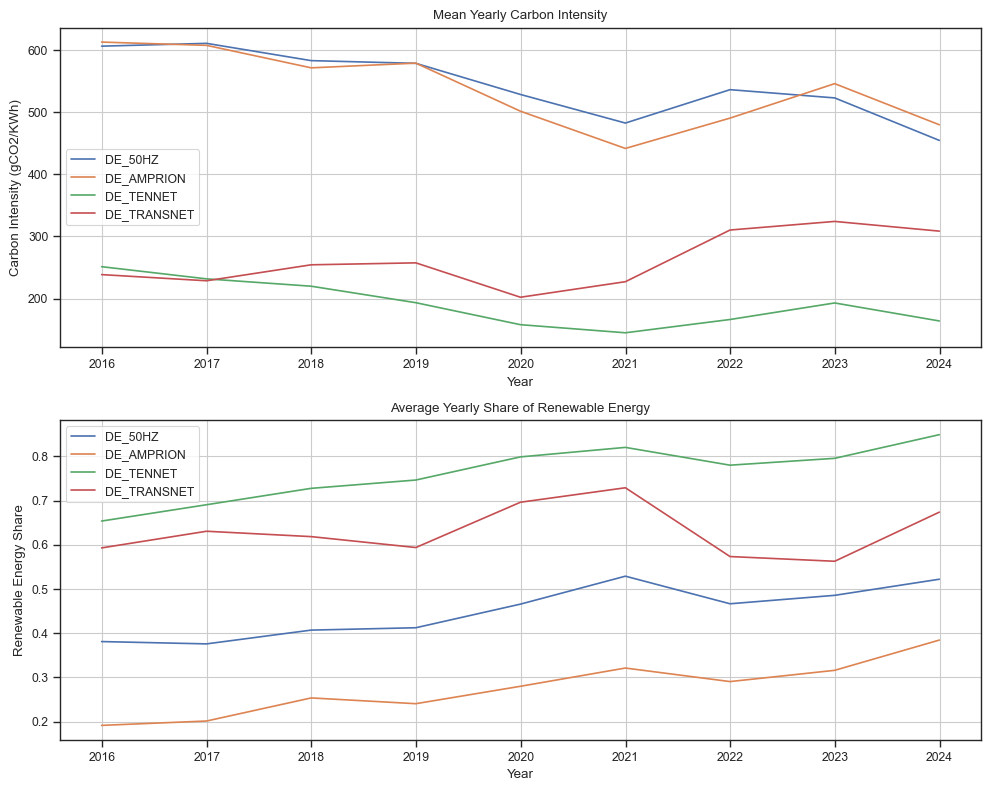

In [17]:
print("Change mean yearly carbon intensity")
for i in TSO_dict:
    #print(i)
    print(TSO_dict[i]["CO2_intensity_in_gCO2_per_KWh"].loc["2015":"2023"].groupby(pd.Grouper(freq='1YE')).mean())
    
print("Change yearly share of renewable energy intensity")
for i in TSO_dict:
    print(i)
    total_renewables = TSO_dict[i]["total_ren"].loc["2015":"2023"].groupby(pd.Grouper(freq='1YE')).sum()
    total_conventionals = TSO_dict[i]["total_conv"].loc["2015":"2023"].groupby(pd.Grouper(freq='1YE')).sum()
    #print(total_renewables/(total_renewables+total_conventionals))
    #print(TSO_dict[i]["CO2_intensity_in_gCO2_per_KWh"].loc["2015":"2023"].groupby(pd.Grouper(freq='1YE')).mean()

# Assuming TSO_dict is already defined and contains the necessary data

# Initialize lists to store data
carbon_intensity_means = []
renewable_energy_shares = []

# Calculate and store data
for i in TSO_dict:
    carbon_intensity_means.append(TSO_dict[i]["CO2_intensity_in_gCO2_per_KWh"].loc["2015":"2023"].groupby(pd.Grouper(freq='1Y')).mean())
    
    total_renewables = TSO_dict[i]["total_ren"].loc["2015":"2023"].groupby(pd.Grouper(freq='1Y')).sum()
    total_conventionals = TSO_dict[i]["total_conv"].loc["2015":"2023"].groupby(pd.Grouper(freq='1Y')).sum()
    renewable_energy_shares.append(total_renewables / (total_renewables + total_conventionals))

# Plotting
fig, axs = plt.subplots(2, figsize=(10, 8))

# Plot carbon intensity
for i in range(len(carbon_intensity_means)):
    axs[0].plot(carbon_intensity_means[i], label=list(TSO_dict.keys())[i])

axs[0].set_title('Mean Yearly Carbon Intensity')
axs[0].set_xlabel('Year')
axs[0].set_ylabel('Carbon Intensity (gCO2/KWh)')
axs[0].grid(True) 
axs[0].legend()

# Plot renewable energy share
for i in range(len(renewable_energy_shares)):
    axs[1].plot(renewable_energy_shares[i], label=list(TSO_dict.keys())[i])

axs[1].set_title('Average Yearly Share of Renewable Energy')
axs[1].set_xlabel('Year')
axs[1].set_ylabel('Renewable Energy Share')
axs[1].grid(True) 
axs[1].legend()

plt.tight_layout()
plt.show()

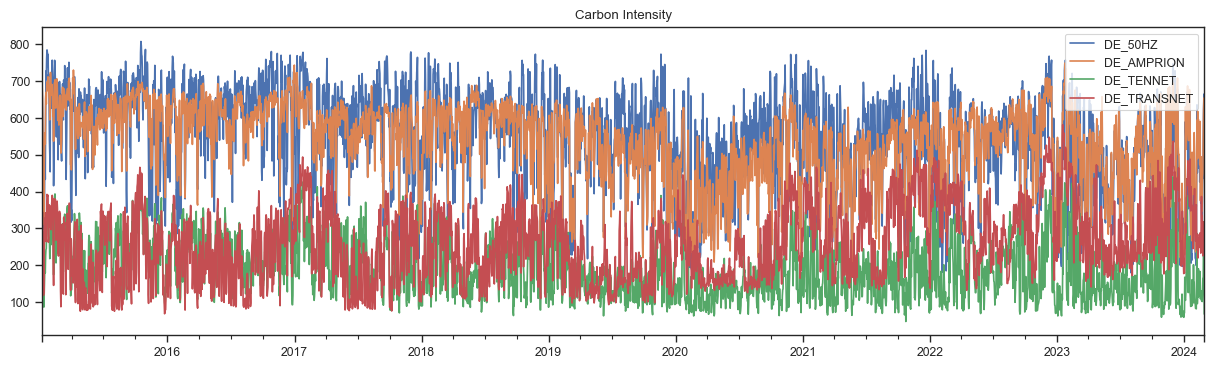

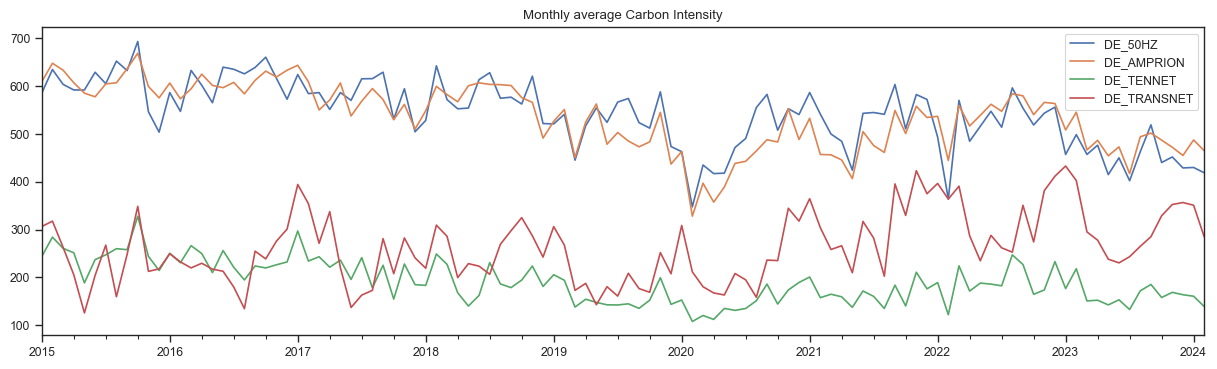

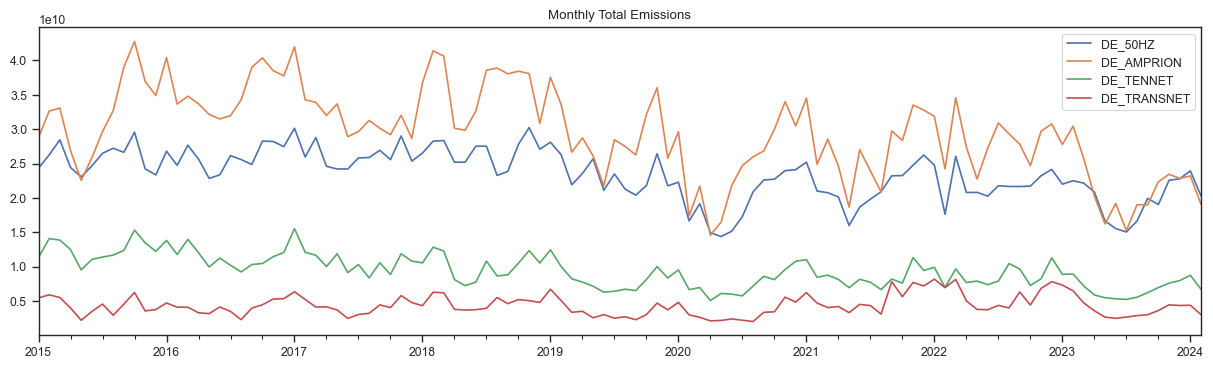

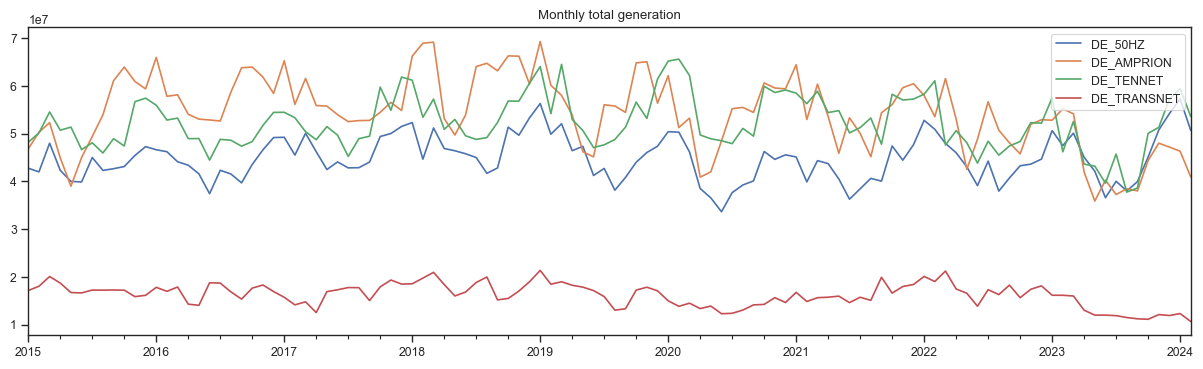

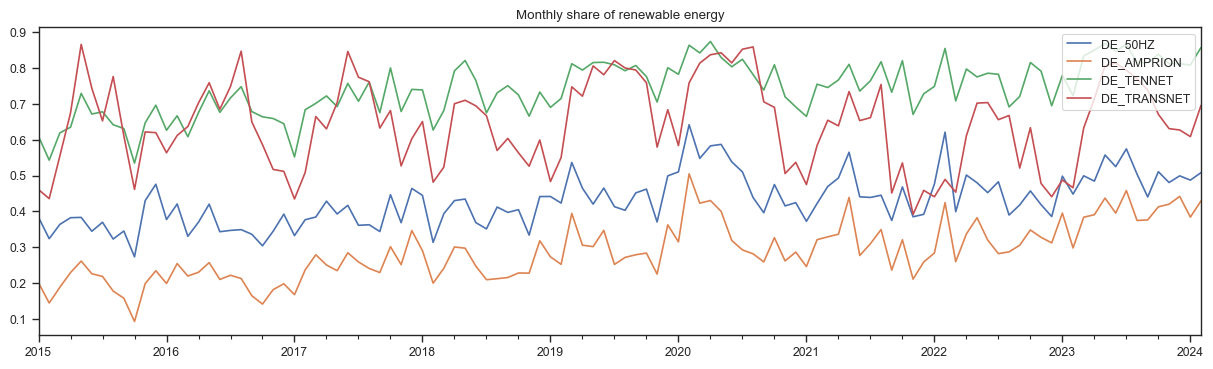

In [18]:
#RAW -CO2 level
figsize = (15,4)
# Time Series Overview
plt.figure(figsize=figsize)
[TSO_dict[i]["CO2_intensity_in_gCO2_per_KWh"].groupby(pd.Grouper(freq='1D')).mean().plot(label=i) for i in TSO_dict ]
#[TSO_dict[i]["CO2_intensity_in_gCO2_per_KWh"].groupby(pd.Grouper(freq='1ME')).mean().plot(label=i) for i in TSO_dict ]
plt.legend(loc='upper right')
plt.title(label="Carbon Intensity")
plt.show()

plt.figure(figsize=figsize)
[TSO_dict[i]["CO2_intensity_in_gCO2_per_KWh"].groupby(pd.Grouper(freq='1ME')).mean().plot(label=i) for i in TSO_dict ]
plt.legend(loc='upper right')
plt.title(label="Monthly average Carbon Intensity")
plt.show()

plt.figure(figsize=figsize)
[TSO_dict[i]["Total_Emissions_in_kg"].groupby(pd.Grouper(freq='1ME')).sum().plot(label=i) for i in TSO_dict ]
plt.legend( loc='upper right')
plt.title(label="Monthly Total Emissions")
plt.show()

plt.figure(figsize=figsize)
[TSO_dict[i]["Total_Generation"].groupby(pd.Grouper(freq='1ME')).sum().plot(label=i) for i in TSO_dict ]
plt.legend( loc='upper right')
plt.title(label="Monthly total generation")
plt.show()

plt.figure(figsize=figsize)
[TSO_dict[i]["share_ren"].groupby(pd.Grouper(freq='1ME')).mean().plot(label=i) for i in TSO_dict ]
plt.legend( loc='upper right')
plt.title(label="Monthly share of renewable energy")
plt.show()

## Trend monthly mean

In [21]:
TSO_dict["DE_50HZ"].dtypes

CO2_intensity_in_gCO2_per_KWh       float64
Total_Emissions_in_kg               float64
Total_Generation                    float64
Biomass                             float64
Fossil Brown coal/Lignite           float64
Fossil Gas                          float64
Fossil Hard coal                    float64
Fossil Oil                          float64
Geothermal                          float64
Hydro Pumped Storage                float64
Hydro Run-of-river and poundage     float64
Other                               float64
Other renewable                     float64
Solar                               float64
Waste                               float64
Wind Offshore                       float64
Wind Onshore                        float64
day_ahead_price                     float64
radiation_global                    float64
sunshine_duration                   float64
temperature_air_mean_200            float64
temperature_dew_point_mean_200      float64
wind_direction                  

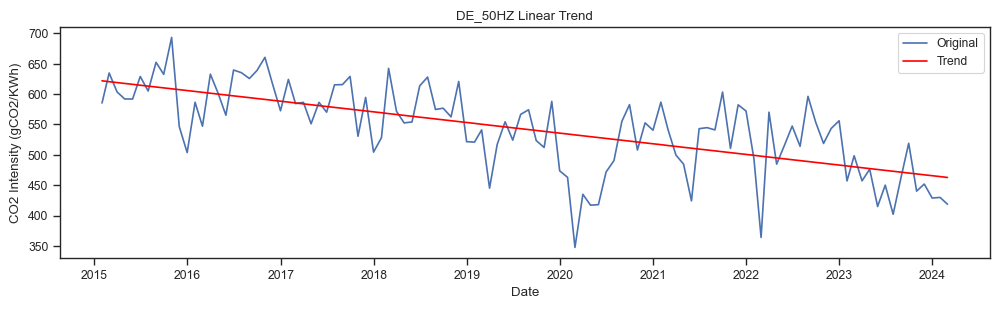

Slope: -1.460875328581865


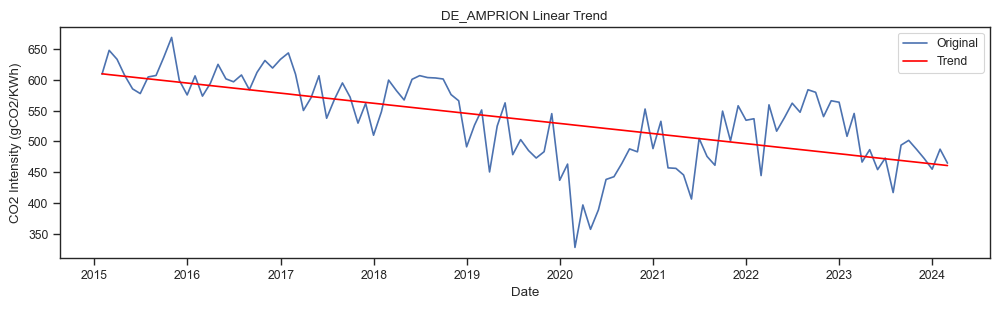

Slope: -1.3662350215324857


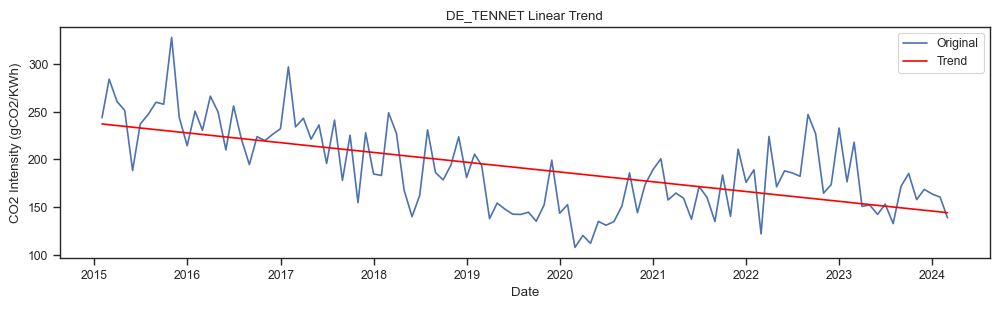

Slope: -0.8539465439123872


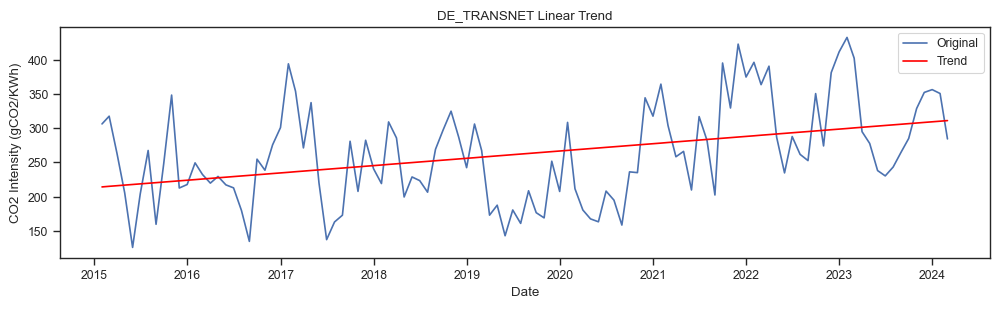

Slope: 0.8900952275654943


In [24]:
# Plot trend line on monthly carbon intensity

for i in TSO_dict:
    dfx = TSO_dict[i].copy()
    dfx = dfx.select_dtypes(exclude=['category','object'])
    dfx = dfx.groupby(pd.Grouper(freq='1ME')).mean()
    
    X = np.array(range(len(dfx))).reshape(-1, 1)  # Independent variable (time as ordinal)
    y = dfx['CO2_intensity_in_gCO2_per_KWh'].values.reshape(-1, 1)  # Dependent variable
    y2 = dfx['share_ren'].values.reshape(-1, 1)
    # Fit linear regression model
    model = LinearRegression()
    model.fit(X, y)
    # Predict trend
    trend = model.predict(X)
    # Plot results
    plt.figure(figsize=(12, 3))
    plt.plot(dfx.index, y, label='Original')
    plt.plot(dfx.index, trend, label='Trend', color='red')
    plt.title(f"{i} Linear Trend")
    plt.xlabel('Date')
    plt.ylabel('CO2 Intensity (gCO2/KWh)')
    plt.legend()
    plt.show()
    # Print the slope (rate of change) and R-squared value
    print(f"Slope: {model.coef_[0][0]}")

#### Explanaition for rising carbon intensity in TransnetBW

average generation from gas in TransnetBW 2018-09-24 to 2022-09-24: 79.82627504553734
average generation from gas in TransnetBW 2020-09-24 to 2022-09-24: 976.8509461924305


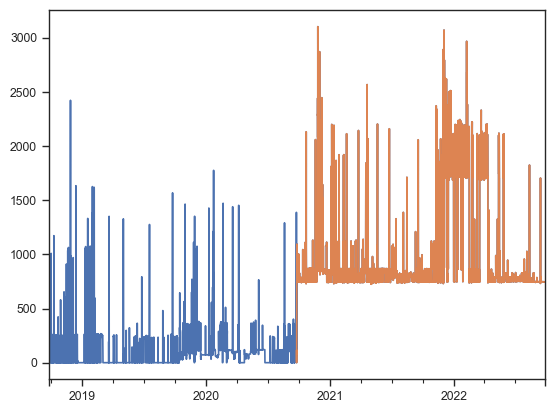

average carbon intensity in TransnetBW 2018-09-24 to 2022-09-24: 213.0958940406816
average carbon intensity in TransnetBW 2020-09-24 to 2022-09-24: 308.85973520311865


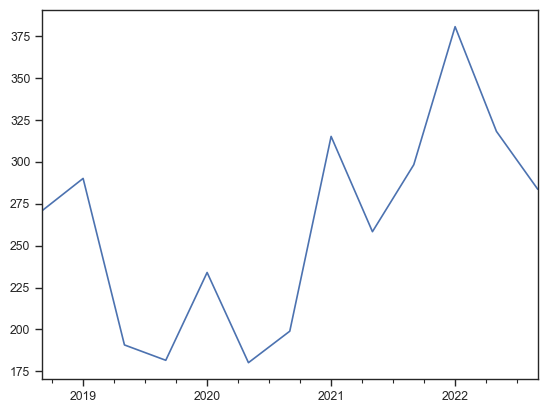

In [26]:
# From data there is a jump in gas generation on 24th Sep 2020 that continous on a new level
# in 2020 two gas plants with a volume of 110 MW where installed: https://www.smard.de/home/ueberblick#!?mapAttributes=%7B%22state%22:%22plant%22,%22plantState%22:%22split%22,%22date%22:1714460400000,%22resolution%22:%22hour%22%7D&filterAttributes=%7B%22company%22:%22%22,%22region%22:%22%22,%22resource%22:%22%22,%22searchText%22:%22%22,%22state%22:%22%22,%22network%22:%22Transnet%20BW%20GmbH%22,%22commissioning%22:%5B2020,2021%5D,%22power%22:%5B0,5000%5D,%22radius%22:100,%22placeId%22:null,%22zoom%22:6,%22center%22:%5B47.3,7.67206187028064%5D,%22plant%22:null%7D
# 
transnet_gas_before_20200924 = TSO_dict["DE_TRANSNET"]["Fossil Gas"].loc["2018-09-24":"2020-09-24"].mean()
transnet_gas_after_20200924 = TSO_dict["DE_TRANSNET"]["Fossil Gas"].loc["2020-09-24":"2022-09-24"].mean()
print(f"average generation from gas in TransnetBW 2018-09-24 to 2022-09-24: {transnet_gas_before_20200924}")
print(f"average generation from gas in TransnetBW 2020-09-24 to 2022-09-24: {transnet_gas_after_20200924}")
plt.figure()
TSO_dict["DE_TRANSNET"]["Fossil Gas"].loc["2018-09-24":"2022-09-24"].plot()
TSO_dict["DE_TRANSNET"]["Fossil Gas"].loc["2020-09-24":"2022-09-24"].plot()
plt.show()
transnet_CI_before_20200924 = TSO_dict["DE_TRANSNET"]["CO2_intensity_in_gCO2_per_KWh"].loc["2018-09-24":"2020-09-24"].mean()
transnet_CI_after_20200924 = TSO_dict["DE_TRANSNET"]["CO2_intensity_in_gCO2_per_KWh"].loc["2020-09-24":"2022-09-24"].mean()
print(f"average carbon intensity in TransnetBW 2018-09-24 to 2022-09-24: {transnet_CI_before_20200924}")
print(f"average carbon intensity in TransnetBW 2020-09-24 to 2022-09-24: {transnet_CI_after_20200924}")
plt.figure()
TSO_dict["DE_TRANSNET"]["CO2_intensity_in_gCO2_per_KWh"].loc["2018-09-24":"2022-09-24"].groupby(pd.Grouper(freq='4ME')).mean().plot()                                                   
#TSO_dict["DE_TRANSNET"]["CO2_intensity_in_gCO2_per_KWh"].loc["2020-09-24":"2022-09-24"].groupby(pd.Grouper(freq='1ME')).plot()
plt.show()

# Correlation

In [31]:
for i in TSO_dict:
    corr_matrix = TSO_dict[i].drop(['GroupKey'], axis=1).corr()
    co2_corr = corr_matrix['CO2_intensity_in_gCO2_per_KWh']

    # Convert to DataFrame
    co2_corr_df = co2_corr.reset_index()
    co2_corr_df.columns = ['Variable', 'Correlation with CO2 Intensity']
    co2_corr_df = co2_corr_df[co2_corr_df['Variable'] != 'CO2_intensity_in_gCO2_per_KWh']
    co2_corr_df['Abs Correlation'] = co2_corr_df['Correlation with CO2 Intensity'].abs()
    co2_corr_df = co2_corr_df.sort_values(by='Abs Correlation', ascending=False).drop('Abs Correlation', axis=1)

    # Print the DataFrame
    print(f"{i} Top ten features correlated with carbon intensity")
    display(co2_corr_df.head(10))


DE_50HZ Top ten features correlated with carbon intensity


,Variable,Correlation with CO2 Intensity
40,share_ren,-0.992917
38,total_ren,-0.933559
16,Wind Onshore,-0.776674
4,Fossil Brown coal/Lignite,0.773665
39,total_conv,0.729614
1,Total_Emissions_in_kg,0.728205
23,wind_speed,-0.661085
2,Total_Generation,-0.580249
6,Fossil Hard coal,0.539218
15,Wind Offshore,-0.531003


DE_AMPRION Top ten features correlated with carbon intensity


,Variable,Correlation with CO2 Intensity
42,share_ren,-0.938052
40,total_ren,-0.809952
4,Fossil Brown coal/Lignite,0.798308
1,Total_Emissions_in_kg,0.764134
41,total_conv,0.700483
18,Wind Onshore,-0.655377
7,Fossil Hard coal,0.599082
25,wind_speed,-0.489394
39,time_idx,-0.359364
16,Solar,-0.344154


DE_TENNET Top ten features correlated with carbon intensity


,Variable,Correlation with CO2 Intensity
42,share_ren,-0.970198
6,Fossil Hard coal,0.848424
41,total_conv,0.837218
1,Total_Emissions_in_kg,0.821345
40,total_ren,-0.764417
18,Wind Onshore,-0.650971
17,Wind Offshore,-0.597182
2,Total_Generation,-0.487552
4,Fossil Brown coal/Lignite,0.359019
5,Fossil Gas,0.349180


DE_TRANSNET Top ten features correlated with carbon intensity


,Variable,Correlation with CO2 Intensity
39,share_ren,-0.901034
38,total_conv,0.873470
5,Fossil Hard coal,0.854479
1,Total_Emissions_in_kg,0.844873
4,Fossil Gas,0.440372
16,day_ahead_price,0.387408
19,temperature_air_mean_200,-0.374567
28,cos_day_of_year,0.363810
13,Solar,-0.343225
17,radiation_global,-0.329091


/Users/carl/anaconda3/envs/230821TestEntsoe/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


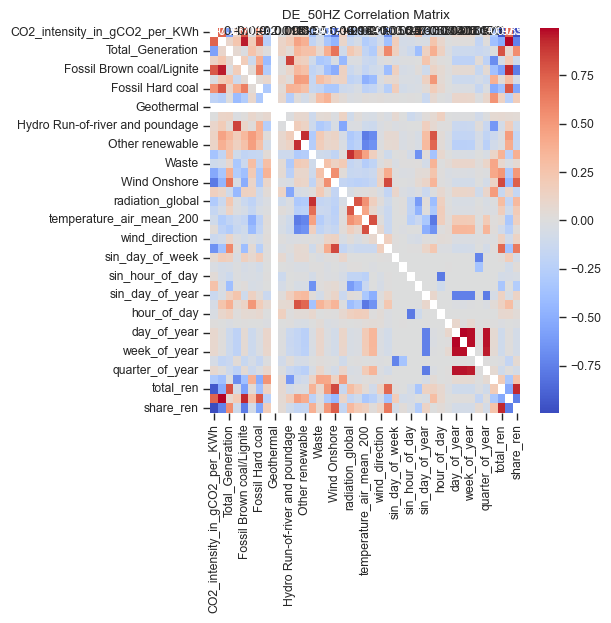

/Users/carl/anaconda3/envs/230821TestEntsoe/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


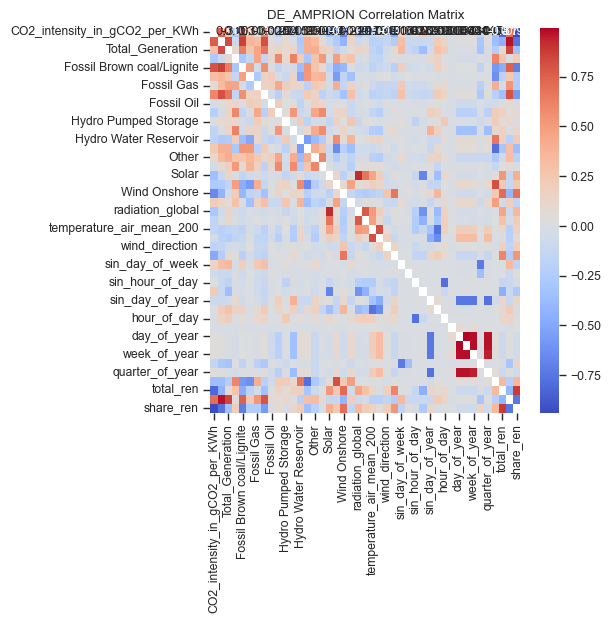

/Users/carl/anaconda3/envs/230821TestEntsoe/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


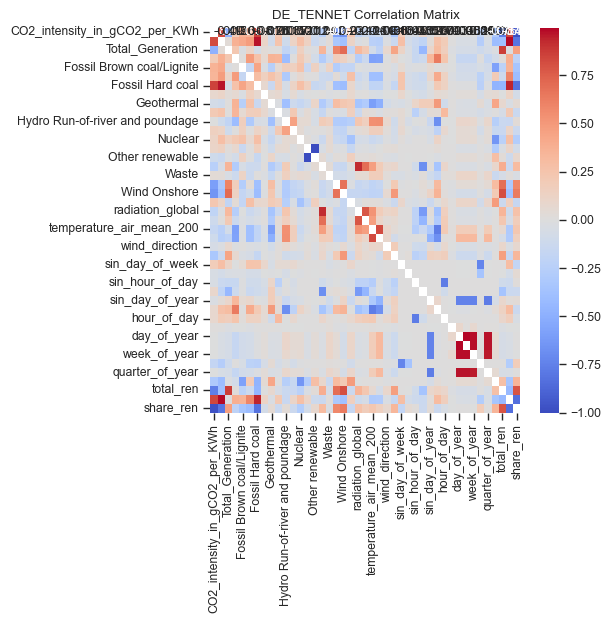

/Users/carl/anaconda3/envs/230821TestEntsoe/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


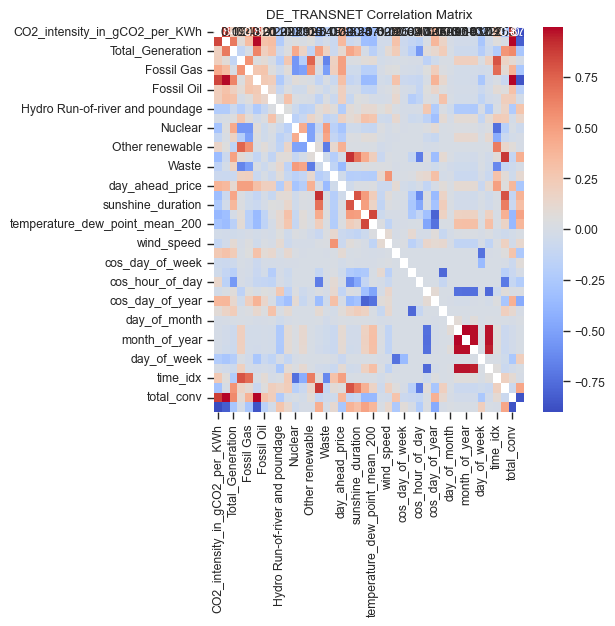

In [37]:
for i in TSO_dict:   
    # Calculate the correlation matrix
    correlation_matrix = TSO_dict[i].drop(['GroupKey'], axis=1).corr()
    np.fill_diagonal(correlation_matrix.values, np.nan)
    # Plot the correlation matrix
    plt.figure(figsize=(5, 5))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')#, fmt=".2f", linewidths=.5, linestyle='--', color='black')
    #plt.plot([0, filtered_correlation_matrix.shape[0]], [0, filtered_correlation_matrix.shape[0]], linestyle='--', color='black')
    plt.title(f'{i} Correlation Matrix')
    plt.show()


Analysis of Generation per TSO and its contribution 
- What generations do TSO zone have in common, which are unique
- How is the energy Mix (plot generation and next to it renewable)
-

In [3]:
# before plotting all relevant columns, it must be check which generations all TSO Zones have in common
# Define the lists of columns for each data frame

# Convert lists to sets

[TSO_compare][f"set_{i}"] for i in TSO 
set_DE_50HZ = set(DE_50HZ)
set_DE_AMPRION = set(DE_AMPRION)
set_DE_TENNET = set(DE_TENNET)
set_DE_TRANSNET = set(DE_TRANSNET)

# Find common elements
common_elements = set_DE_50HZ & set_DE_AMPRION & set_DE_TENNET & set_DE_TRANSNET

# Find unique elements
unique_E_50HZ = set_E_50HZ - (set_DE_AMPRION | set_DE_TENNET | set_DE_TRANSNET)
unique_DE_AMPRION = set_DE_AMPRION - (set_E_50HZ | set_DE_TENNET | set_DE_TRANSNET)
unique_DE_TENNET = set_DE_TENNET - (set_E_50HZ | set_DE_AMPRION | set_DE_TRANSNET)
unique_DE_TRANSNET = set_DE_TRANSNET - (set_E_50HZ | set_DE_AMPRION | set_DE_TENNET)

print("Common Elements:", common_elements)
print("Unique to E_50HZ:", unique_E_50HZ)
print("Unique to DE_AMPRION:", unique_DE_AMPRION)
print("Unique to DE_TENNET:", unique_DE_TENNET)

SyntaxError: invalid syntax (2690646.py, line 6)

# Stationarity 

In [ ]:
# ADF test for all features
def check_stationarity(timeseries):
    adf_result = adfuller(timeseries)
    return adf_result[1] <= 0.05

for i in TSO_dict:
    for j in TSO_dict[i].columns:
        try:
            is_stationary = check_stationarity(TSO_dict[i][j])
            print(f"{i} - {j}: {is_stationary}")
        except:
            print(f"{i} - {j}: exception")

DE_50HZ - CO2_intensity_in_gCO2_per_KWh: True
DE_50HZ - Total_Emissions_in_kg: True
DE_50HZ - Total_Generation: True
DE_50HZ - Biomass: exception
DE_50HZ - Fossil Brown coal/Lignite: True
DE_50HZ - Fossil Gas: True
DE_50HZ - Fossil Hard coal: True
DE_50HZ - Fossil Oil: exception
DE_50HZ - Geothermal: exception
DE_50HZ - Hydro Pumped Storage: True
DE_50HZ - Hydro Run-of-river and poundage: True
DE_50HZ - Other: True
DE_50HZ - Other renewable: True
DE_50HZ - Solar: True
DE_50HZ - Waste: True
DE_50HZ - Wind Offshore: True
DE_50HZ - Wind Onshore: True
DE_50HZ - day_ahead_price: True
DE_50HZ - radiation_global: True
DE_50HZ - sunshine_duration: True
DE_50HZ - temperature_air_mean_200: True
DE_50HZ - temperature_dew_point_mean_200: True
DE_50HZ - wind_direction: True
DE_50HZ - wind_speed: True
DE_50HZ - sin_day_of_week: True
DE_50HZ - cos_day_of_week: True
DE_50HZ - sin_hour_of_day: True
DE_50HZ - cos_hour_of_day: True
DE_50HZ - sin_day_of_year: False
DE_50HZ - cos_day_of_year: True
DE_50HZ 

In [ ]:
#non-staionary features
#DE_50Hertz - year: ***False***
##DE_50Hertz - sin_day: ***False***
#DE_AMPRION - Other renewable: ***False***
#DE_AMPRION - year: ***False***
#DE_AMPRION - sin_day: ***False***
#DE_TENNET - Biomass: ***False***
#DE_TENNET - Other: ***False***
#DE_TENNET - Other renewable: ***False***
#DE_TENNET - year: ***False***
#DE_TENNET - sin_day: ***False***
#DE_TRANSNET - Other: ***False***
#DE_TRANSNET - Other renewable: ***False***
#DE_TRANSNET - year: ***False***
#'DE_TRANSNET - sin_day: ***False***

#Plot of non-datetime features
#TSO_dict["DE_50HZ"]["year"].unique
#TSO_dict["DE_50HZ"]["sin_day"].plot()

#TSO_dict["DE_AMPRION"]["Other renewable"].plot()

#TSO_dict["DE_AMPRION"]["Other renewable"].plot()

plt.figure(figsize=(4,2))
TSO_dict["DE_AMPRION"]["Other renewable"].plot()
plt.title(label="[DE_AMPRION][Other renewable]")
plt.show()
plt.figure(figsize=(4,2))
TSO_dict["DE_TENNET"]["Biomass"].plot()
plt.title(label="[DE_TENNET][Biomass]")
plt.show()
plt.figure(figsize=(4,2))
TSO_dict["DE_TENNET"]["Other"].plot()
plt.title(label="[DE_TENNET][Other]")
plt.show()
plt.figure(figsize=(4,2))
TSO_dict["DE_TENNET"]["Other renewable"].plot()
plt.title(label="[DE_TENNET][Other renewable]")
plt.show()
plt.figure(figsize=(4,2))
TSO_dict["DE_TRANSNET"]["Other"].plot()
plt.title(label="[DE_TRANSNET][Other]")
plt.show()
plt.figure(figsize=(4,2))
TSO_dict["DE_TRANSNET"]["Other renewable"].plot()
plt.title(label="[DE_TRANSNET][Other renewable]")
plt.show()

In [ ]:
#stationarity of carboon intensity
for i in TSO_dict:
    is_stationary = check_stationarity(TSO_dict[i]["CO2_intensity_in_gCO2_per_KWh"])
    print(f"{i} - {j}: {is_stationary}")

# Seasonality 

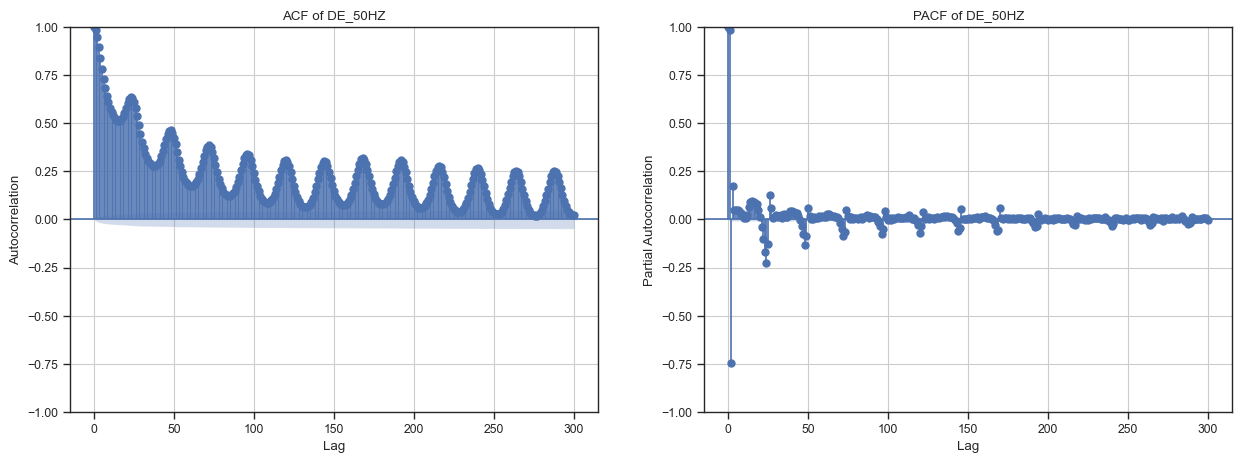

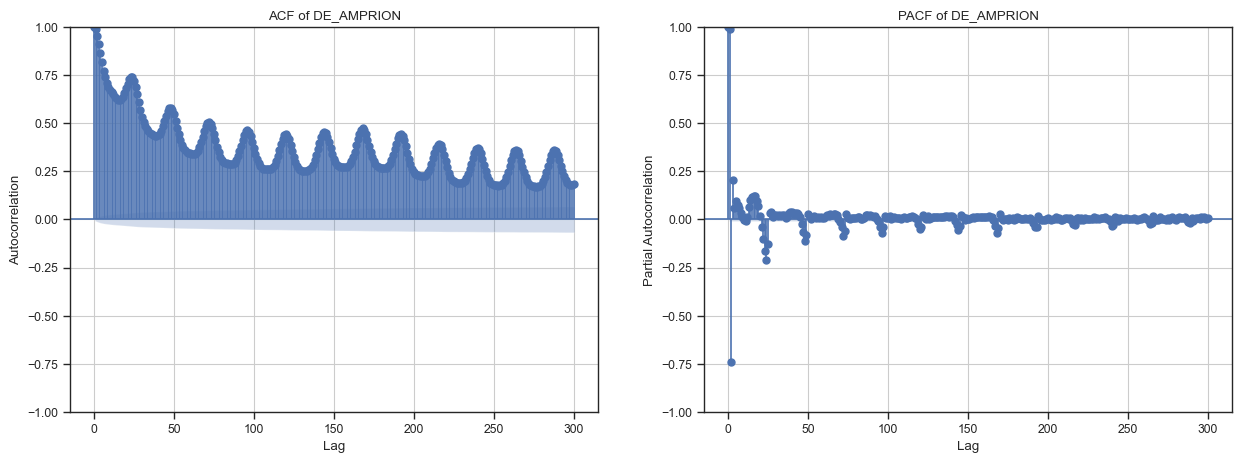

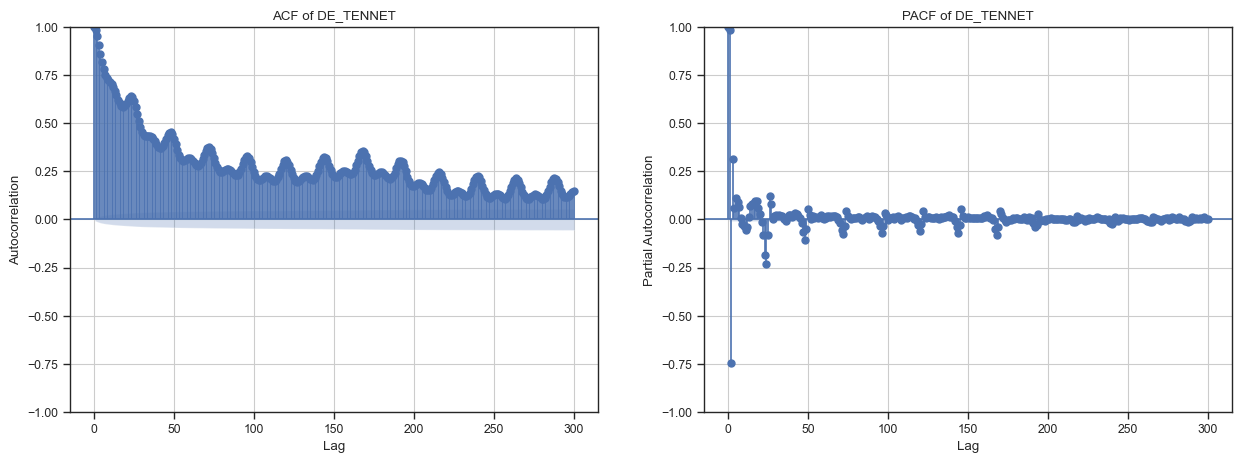

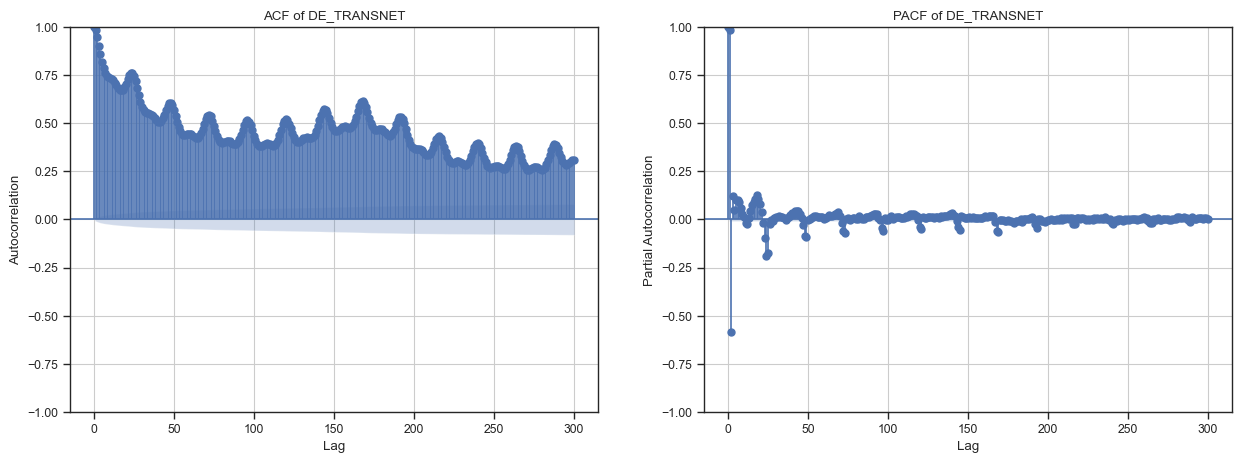

<Figure size 640x480 with 0 Axes>

In [143]:
def plot_acf_pacf(tso_data, title):
    """Plots ACF and PACF for a given TSO data entry"""

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

    # ACF Plot
    plot_acf(tso_data, lags=300, ax=ax1, title="ACF of " + title)  # Specify lags if needed
    ax1.set_xlabel('Lag')
    ax1.set_ylabel('Autocorrelation')
    ax1.grid(True)

    # PACF Plot
    plot_pacf(tso_data, lags=300, ax=ax2, title="PACF of " + title)  # Specify lags if needed
    ax2.set_xlabel('Lag')
    ax2.set_ylabel('Partial Autocorrelation')
    ax2.grid(True)

    #plt.show()
    #plt.savefig()

# Main loop for plotting
for i in TSO_dict:
    plot_acf_pacf(TSO_dict[i]['CO2_intensity_in_gCO2_per_KWh'], i)
plt.show()
plt.savefig("AcfPacf_all")

### Plot seasonality winter(month 12-02) vs. Summer(month 06-08)

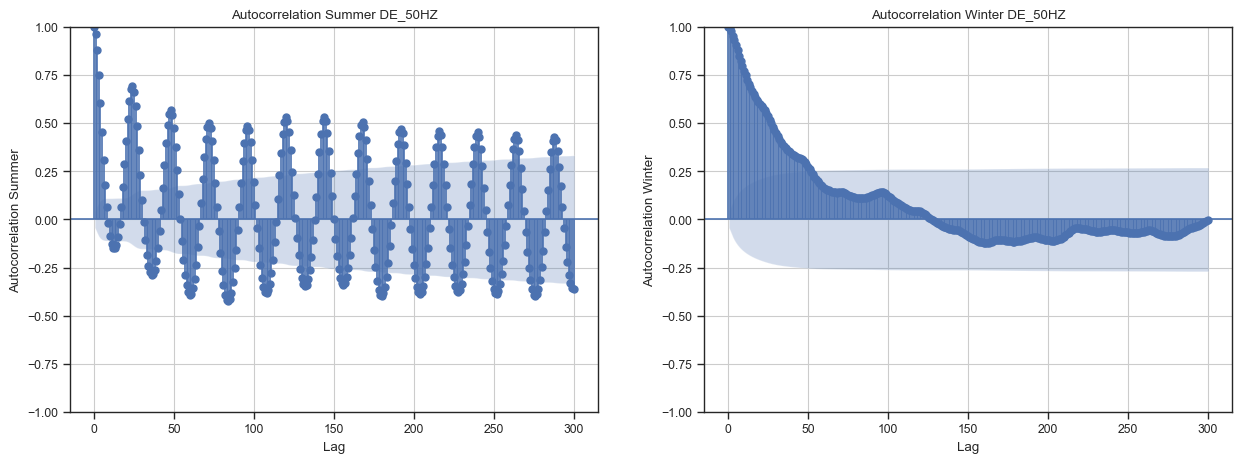

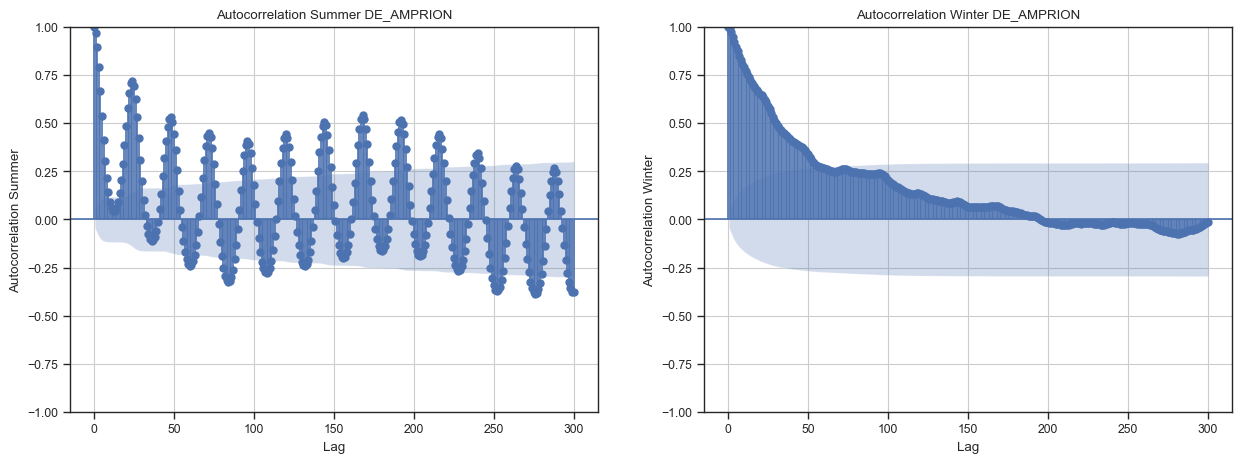

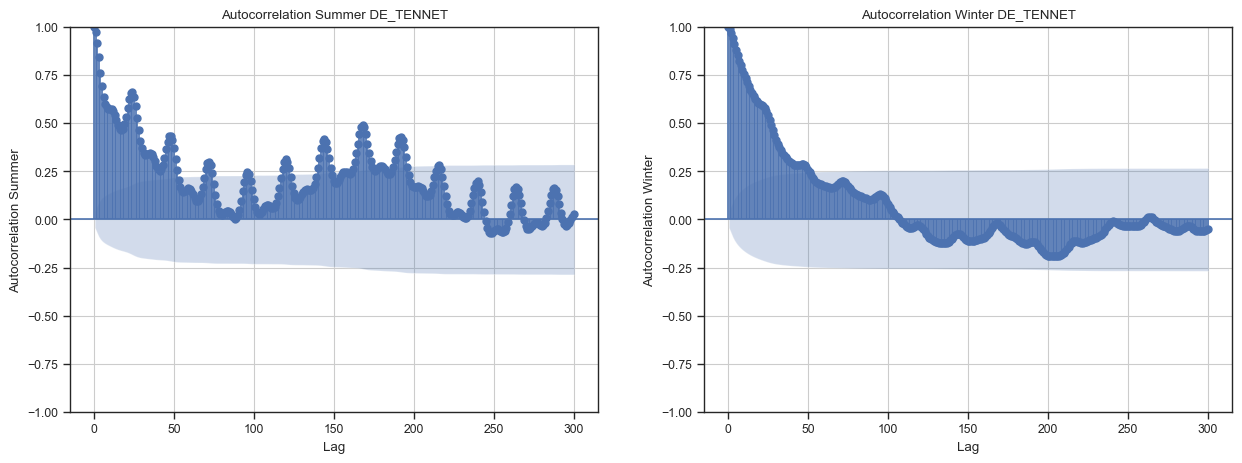

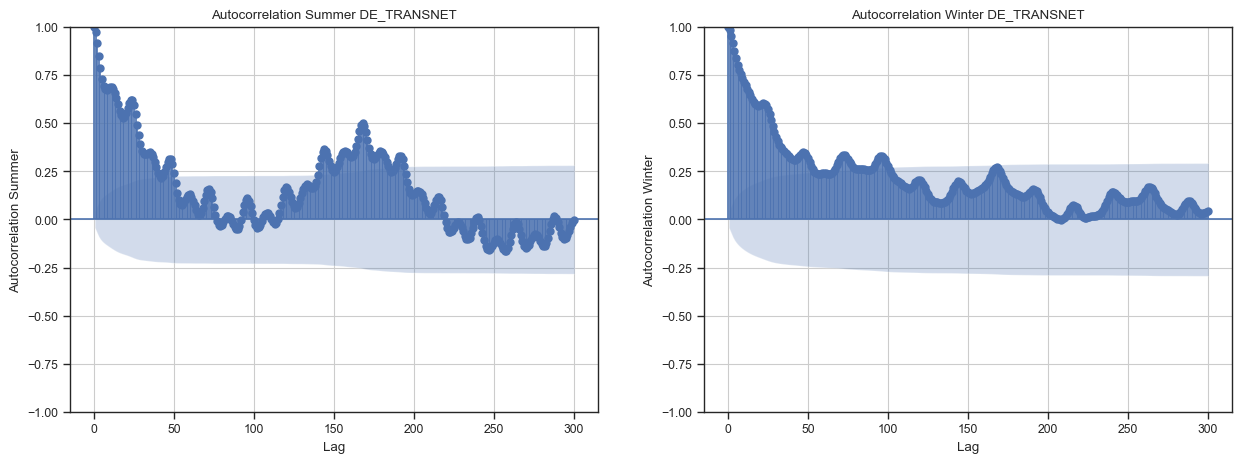

<Figure size 640x480 with 0 Axes>

In [181]:
def plot_acf_winter_summer(tso_data, title):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

    # ACF Summer
    plot_acf(tso_data.loc["2018-06":"2018-08"], lags=300, ax=ax1, title="Autocorrelation Summer " + title)  # Specify lags if needed
    ax1.set_xlabel('Lag')
    ax1.set_ylabel('Autocorrelation Summer')
    ax1.grid(True)

    # ACF Winter
    plot_acf(tso_data.loc["2017-12":"2018-02"], lags=300, ax=ax2, title="Autocorrelation Winter " + title)  # Specify lags if needed
    ax2.set_xlabel('Lag')
    ax2.set_ylabel('Autocorrelation Winter')
    ax2.grid(True)

    #plt.show()
    #plt.savefig()

# Main loop for plotting
for i in TSO_dict:
    plot_acf_winter_summer(TSO_dict[i]['CO2_intensity_in_gCO2_per_KWh'], i)
plt.show()
plt.savefig("ACF_summerVSwinter")

# Daily average carbon intensity per month

In [4]:
#with open("data/gb_ci.csv", "r") as csvfile:
    #gb = pd.read_csv(csvfile, index_col=0, parse_dates=True)["Carbon Intensity"].rename("Great Britain")
CI_50HZ = df_50HZ["CO2_intensity_in_gCO2_per_KWh"].rename("50Hertz")
#with open("data/ger_ci.csv", "r") as csvfile:
    #ger = pd.read_csv(csvfile, index_col=0, parse_dates=True)["Carbon Intensity"].rename("Germany")
CI_AMPRION = df_AMPRION["CO2_intensity_in_gCO2_per_KWh"].rename("Amprion")
#with open("data/cal_ci.csv", "r") as csvfile:
    #cal = pd.read_csv(csvfile, index_col=0, parse_dates=True)["Carbon Intensity"].rename("California")
CI_TENNET = df_TENNET["CO2_intensity_in_gCO2_per_KWh"].rename("Tennet")
#with open("data/fr_ci.csv", "r") as csvfile:
    #fr = pd.read_csv(csvfile, index_col=0, parse_dates=True)["Carbon Intensity"].rename("France")
CI_TRANSNET = df_TRANSNET["CO2_intensity_in_gCO2_per_KWh"].rename("TransnetBW")

CI_AMPRION = CI_AMPRION["2022-01-01 00:00:00":"2023-01-01 00:00:00"]
CI_50HZ = CI_50HZ["2022-01-01 00:00:00":"2023-01-01 00:00:00"]
CI_TENNET = CI_TENNET["2022-01-01 00:00:00":"2023-01-01 00:00:00"]
CI_TRANSNET = CI_TRANSNET["2022-01-01 00:00:00":"2023-01-01 00:00:00"]


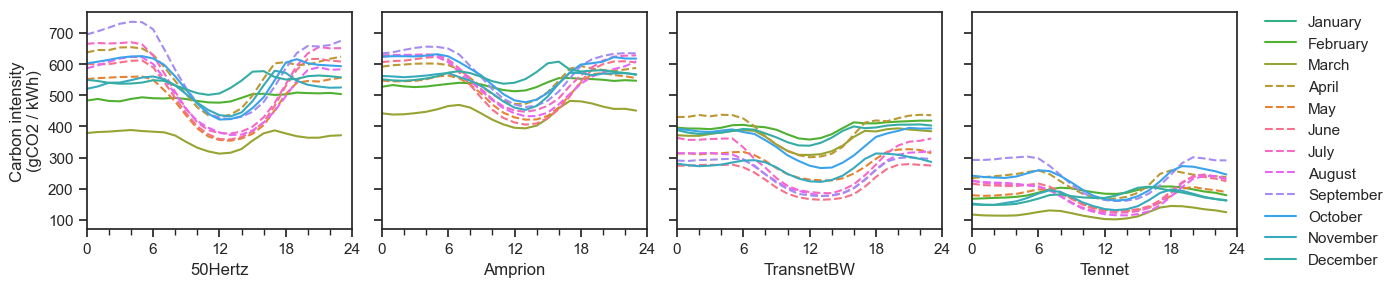

In [5]:
sns.set_theme(style='ticks')

f, axs = plt.subplots(ncols=4, nrows=1, sharey=True, sharex=True, figsize=(12,2.5))
f.tight_layout(pad=0)

palette = sns.palettes._ColorPalette(np.roll(np.flip(sns.color_palette("husl", 12), axis=0), 6, axis=0))

for ax, s, country in zip(axs, [CI_50HZ, CI_AMPRION, CI_TRANSNET, CI_TENNET], ["50Hertz","Amprion",  "TransnetBW", "Tennet"]):
    x = pd.DataFrame(s)
    
    for month, color, linestyle in zip(range(12), palette, ["-","-","-","--","--","--","--","--","--","-","-","-"]):
        xm = x[x.index.month == month]
        xm = xm.groupby(xm.index.hour * 60 + xm.index.minute).mean()
        ax.plot(xm.index, xm[country], color=color, linestyle=linestyle, label=month)
    
    ax.set(xlabel=country)
    ax.set_xlim(0, 1440)
    ticks = range(0, 24*60+1, 60*6)
    minior_ticks = range(0, 24*60+1, 60*2)
    ax.set_xticks(ticks)
    ax.set_xticks(minior_ticks, minor=True)
    ax.set_xticklabels([f"{int(tick/60)}" for tick in ticks])

handles, labels = ax.get_legend_handles_labels()
f.legend(handles, ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"], loc='upper right', bbox_to_anchor=(1.12, 1.02), frameon=False)

axs[0].set(ylabel='Carbon intensity\n(gCO2 / kWh)')

#plt.savefig("CI_daily_monthly2022.png", dpi=300, bbox_inches='tight')
plt.show()

# Daily average share of renewables energy per month for summer and winter

In [8]:

ren_share_50HZ = df_50HZ["share_ren"].rename("50Hertz")
ren_share_AMPRION = df_AMPRION["share_ren"].rename("Amprion")
ren_share_TENNET = df_TENNET["share_ren"].rename("Tennet")
ren_share_TRANSNET = df_TRANSNET["share_ren"].rename("TransnetBW")

ren_share_AMPRION = ren_share_AMPRION["2022-01-01 00:00:00":"2023-01-01 00:00:00"]
ren_share_50HZ = ren_share_50HZ["2022-01-01 00:00:00":"2023-01-01 00:00:00"]
ren_share_TENNET = ren_share_TENNET["2022-01-01 00:00:00":"2023-01-01 00:00:00"]
ren_share_TRANSNET = ren_share_TRANSNET["2022-01-01 00:00:00":"2023-01-01 00:00:00"]


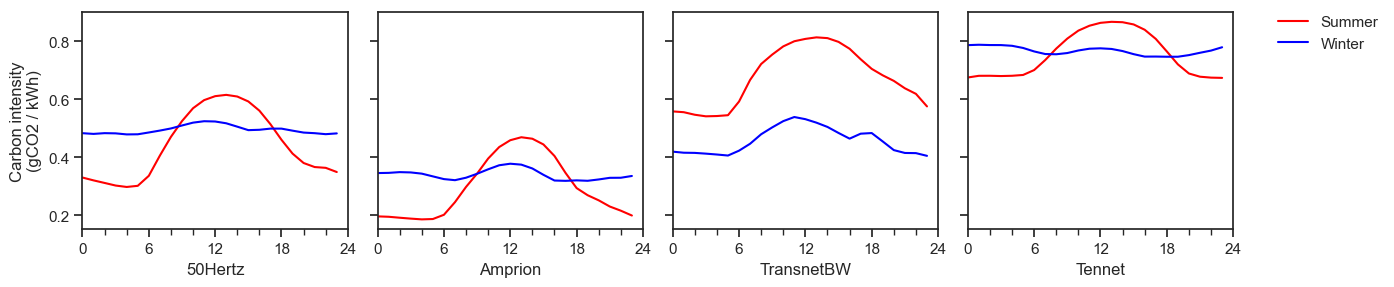

In [9]:
sns.set_theme(style='ticks')

f, axs = plt.subplots(ncols=4, nrows=1, sharey=True, sharex=True, figsize=(12,2.5))
f.tight_layout(pad=0)

palette = sns.palettes._ColorPalette(np.roll(np.flip(sns.color_palette("husl", 12), axis=0), 6, axis=0))

# Define summer and winter months
summer_months = [6, 7, 8]
winter_months = [12, 1, 2]

for ax, s, country in zip(axs, [ren_share_50HZ, ren_share_AMPRION, ren_share_TRANSNET, ren_share_TENNET], ["50Hertz","Amprion", "TransnetBW", "Tennet"]):
    x = pd.DataFrame(s)
    
    # Aggregate data for summer months
    summer_data = []
    for month in summer_months:
        xm = x[x.index.month == month]
        xm = xm.groupby(xm.index.hour * 60 + xm.index.minute).mean()
        summer_data.append(xm[country])
    summer_data = pd.concat(summer_data, axis=1).mean(axis=1)
    
    # Aggregate data for winter months
    winter_data = []
    for month in winter_months:
        xm = x[x.index.month == month]
        xm = xm.groupby(xm.index.hour * 60 + xm.index.minute).mean()
        winter_data.append(xm[country])
    winter_data = pd.concat(winter_data, axis=1).mean(axis=1)
    
    # Plot summer and winter data
    ax.plot(summer_data.index, summer_data, color='red', linestyle='-', label='Summer')
    ax.plot(winter_data.index, winter_data, color='blue', linestyle='-', label='Winter')
    
    ax.set(xlabel=country)
    ax.set_xlim(0, 1440)
    ticks = range(0, 24*60+1, 60*6)
    minior_ticks = range(0, 24*60+1, 60*2)
    ax.set_xticks(ticks)
    ax.set_xticks(minior_ticks, minor=True)
    ax.set_xticklabels([f"{int(tick/60)}" for tick in ticks])

    handles, labels = ax.get_legend_handles_labels()

# Set ylabel for the first subplot
axs[0].set(ylabel='Carbon intensity\n(gCO2 / kWh)')

# Add legend to the last subplot
f.legend(handles, labels, loc='upper right', bbox_to_anchor=(1.12, 1.02), frameon=False)

plt.show()